## Step 1: Reading and Understanding Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the relevant libraries (that are needed immediately to process the data in the following code blocks):
import pandas as pd
import numpy as np

In [3]:
# Reading the raw data set in the pandas data fram "bike_sharing_df":
bike_sharing_df = pd.read_csv('day.csv')
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Dropping the 'fluff' from this raw data frame 'bike_sharing_df':
# Dropping 'instant' as serial numbers are mostly not important in data analysis and model building.
# Dropping 'dteday' as there are already other columns describing the same. So, this column 'dteday' is redundant.
# Dropping 'casual' and 'registered' columns as they are directly related to the 'cnt' column (casual + registered = cnt).
bike_sharing_df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)

In [5]:
# Checking the top 5 rows of the data frame 'bike_sharing_df' again:
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Let us do basic checks on the data frame 'bike_sharing_df' to get familiar with the data in it:

In [6]:
#Checking the shape of the raw data frame 'bike_sharing_df':
bike_sharing_df.shape

(730, 12)

In [7]:
# Checking basic info of the raw data frame 'bike_sharing_df':
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [8]:
# We can see that there is no null value in any of the columns. Thus, we do not need to worry about treating the null data

In [9]:
bike_sharing_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [10]:
# Since the number of columns is less, let us do value counts on each one to find if we can find some valuable information
# Let us also find the unique values in each column as we go along:

In [11]:
bike_sharing_df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [12]:
bike_sharing_df['season'].value_counts().sum()

730

In [13]:
bike_sharing_df['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [14]:
bike_sharing_df['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

In [15]:
bike_sharing_df['yr'].value_counts().sum()

730

In [16]:
bike_sharing_df['yr'].unique()

array([0, 1], dtype=int64)

In [17]:
bike_sharing_df['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [18]:
# When we do sum of these values, it comes out to be 730 - which is the number of rows we got when we ran the shape command
# on this data frame 'bike_sharing_df':

bike_sharing_df['mnth'].value_counts().sum()

730

In [19]:
bike_sharing_df['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [20]:
bike_sharing_df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [21]:
bike_sharing_df['holiday'].value_counts().sum()

730

In [22]:
bike_sharing_df['holiday'].unique()

array([0, 1], dtype=int64)

In [23]:
bike_sharing_df['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [24]:
bike_sharing_df['weekday'].value_counts().sum()

730

In [25]:
bike_sharing_df['weekday'].unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [26]:
bike_sharing_df['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [27]:
bike_sharing_df['workingday'].value_counts().sum()

730

In [28]:
bike_sharing_df['workingday'].unique()

array([1, 0], dtype=int64)

In [29]:
bike_sharing_df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [30]:
bike_sharing_df['weathersit'].value_counts().sum()

730

In [31]:
bike_sharing_df['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [32]:
bike_sharing_df['temp'].value_counts()

10.899153    5
26.035000    5
23.130847    4
28.563347    4
27.880000    4
            ..
27.025847    1
19.270000    1
13.191299    1
24.155847    1
5.526103     1
Name: temp, Length: 498, dtype: int64

In [33]:
bike_sharing_df['temp'].value_counts().sum()

730

In [34]:
bike_sharing_df['temp'].unique()

array([14.110847 , 14.902598 ,  8.050924 ,  8.2      ,  9.305237 ,
        8.378268 ,  8.057402 ,  6.765    ,  5.671653 ,  6.184153 ,
        6.932731 ,  7.081807 ,  6.59567  ,  9.566653 ,  9.498347 ,
        7.209153 ,  8.883347 , 11.979134 , 10.728347 ,  7.2775   ,
        2.4243464,  3.9573897,  3.9930433,  9.162598 ,  8.9175   ,
        7.995    ,  8.342598 ,  8.877402 ,  7.414153 ,  7.879134 ,
       10.66     ,  7.665237 ,  8.663464 , 11.719153 , 11.138347 ,
        9.054153 ,  5.526103 ,  5.918268 ,  7.752731 ,  9.1225   ,
       12.977402 , 17.015    , 10.909567 , 13.048701 , 17.869153 ,
       21.388347 , 16.365847 , 11.693897 , 12.436653 ,  7.471102 ,
        9.091299 , 12.121732 , 14.938268 , 11.5825   , 14.082598 ,
       16.698193 , 10.933347 , 13.735    ,  8.131653 , 15.750847 ,
       15.437402 , 10.731299 , 11.9925   , 12.129153 , 15.952731 ,
       13.495847 , 15.758268 , 13.333897 , 13.013031 , 14.973897 ,
       22.14     , 19.3725   , 13.6325   , 17.647835 , 18.1083

In [35]:
bike_sharing_df['atemp'].value_counts()

32.73440    4
18.78105    3
31.85040    3
16.28750    2
17.58145    2
           ..
36.96315    1
24.93625    1
32.73460    1
14.82130    1
9.31250     1
Name: atemp, Length: 689, dtype: int64

In [36]:
bike_sharing_df['atemp'].value_counts().sum()

730

In [37]:
bike_sharing_df['atemp'].unique()

array([18.18125 , 17.68695 ,  9.47025 , 10.6061  , 11.4635  , 11.66045 ,
       10.44195 ,  8.1127  ,  5.80875 ,  7.5444  ,  9.5732  ,  8.02365 ,
        7.54415 ,  9.42065 , 12.4056  , 11.71085 ,  8.83855 , 11.61665 ,
       14.9211  , 12.7525  ,  7.89165 ,  3.95348 ,  4.941955,  5.8965  ,
       11.7263  , 10.18    , 10.985   , 11.16585 , 10.6063  , 12.5161  ,
        9.3125  , 11.7265  , 12.72085 ,  8.8939  , 11.42935 , 12.1529  ,
       14.58355 , 15.1829  ,  9.9123  ,  7.21415 ,  7.4774  , 10.67545 ,
       11.6477  , 16.20565 , 19.9175  , 12.7137  , 15.81    , 21.4329  ,
       25.59915 , 19.5702  , 13.8665  , 14.20375 ,  9.30165 , 12.28585 ,
       14.45955 , 17.52305 , 14.1096  , 17.55545 , 20.0059  , 13.19395 ,
       16.00355 , 10.00665 , 12.78395 , 18.93895 , 18.3126  , 11.92305 ,
       15.12    , 14.3304  , 19.2834  , 15.25    , 16.2875  , 19.00455 ,
       16.6     , 15.9089  , 18.3465  , 20.51665 , 26.35045 , 23.32625 ,
       20.48675 , 22.0321  , 16.89695 , 13.54165 , 

In [38]:
bike_sharing_df['hum'].value_counts()

61.3333    4
69.7083    3
59.0000    3
57.0000    3
72.9583    3
          ..
64.7917    1
44.9583    1
71.2083    1
50.0417    1
49.8750    1
Name: hum, Length: 594, dtype: int64

In [39]:
bike_sharing_df['hum'].value_counts().sum()

730

In [40]:
bike_sharing_df['hum'].unique()

array([80.5833, 69.6087, 43.7273, 59.0435, 43.6957, 51.8261, 49.8696,
       53.5833, 43.4167, 48.2917, 68.6364, 59.9545, 47.0417, 53.7826,
       49.875 , 48.375 , 53.75  , 86.1667, 74.1739, 53.8333, 45.7083,
       40.    , 43.6522, 49.1739, 61.6957, 86.25  , 68.75  , 79.3043,
       65.1739, 72.2174, 60.375 , 82.9565, 77.5417, 43.7826, 58.5217,
       92.9167, 56.8333, 73.8333, 53.7917, 49.4783, 43.7391, 50.6364,
       54.4167, 45.7391, 37.5833, 31.4348, 42.3478, 50.5   , 51.6667,
       18.7917, 40.7826, 60.5   , 57.7778, 42.3043, 69.7391, 71.2174,
       68.    , 87.6364, 53.5   , 44.9583, 31.8333, 61.0417, 78.9167,
       94.8261, 55.1304, 42.0833,  0.    , 64.9565, 59.4583, 52.7391,
       49.6957, 65.5652, 77.6522, 60.2917, 52.5217, 37.9167, 47.375 ,
       73.7391, 62.4583, 83.9565, 49.5   , 39.4167, 49.3913, 30.2174,
       31.4167, 64.6667, 91.8333, 68.625 , 65.375 , 48.    , 42.625 ,
       64.2083, 47.0833, 83.625 , 87.75  , 85.75  , 71.6956, 73.9167,
       81.9167, 54.0

In [41]:
bike_sharing_df['windspeed'].value_counts()

7.416900     3
15.333486    3
7.959064     3
11.166689    3
7.125450     3
            ..
14.500475    1
8.250514     1
19.416332    1
16.522200    1
9.750175     1
Name: windspeed, Length: 649, dtype: int64

In [42]:
bike_sharing_df['windspeed'].value_counts().sum()

730

In [43]:
bike_sharing_df['windspeed'].unique()

array([10.749882 , 16.652113 , 16.636703 , 10.739832 , 12.5223   ,
        6.0008684, 11.304642 , 17.875868 , 24.25065  , 14.958889 ,
        8.182844 , 20.410009 , 20.167    ,  8.478716 , 10.583521 ,
       12.625011 , 12.999139 ,  9.833925 , 13.957239 , 13.125568 ,
       23.667214 , 11.52199  , 16.5222   , 10.60811  ,  8.696332 ,
       19.68795  ,  7.627079 ,  8.2611   ,  9.739455 ,  4.9568342,
       12.541864 ,  3.565271 , 17.708636 , 18.609384 ,  8.565213 ,
       10.792293 ,  9.5006   ,  3.0423561, 12.652213 , 14.869645 ,
        7.27285  , 13.625589 , 17.479161 , 27.999836 , 19.522058 ,
       16.869997 , 15.416968 , 17.749975 , 34.000021 , 14.956745 ,
       20.625682 , 13.110761 ,  6.305571 , 16.783232 , 23.218113 ,
       12.500257 ,  8.391616 , 19.408962 , 14.500475 , 20.624811 ,
       15.125518 , 13.624182 , 16.875357 , 23.000229 , 22.870584 ,
        8.08355  , 14.75005  , 17.545759 , 15.60899  , 14.791925 ,
       18.130468 ,  9.174042 , 12.348703 , 13.608839 , 14.0417

In [44]:
bike_sharing_df['cnt'].value_counts()

5119    2
4274    2
3784    2
6883    2
2077    2
       ..
6273    1
5501    1
4760    1
1683    1
4097    1
Name: cnt, Length: 695, dtype: int64

In [45]:
bike_sharing_df['cnt'].value_counts().sum()

730

In [46]:
bike_sharing_df['cnt'].unique()

array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321, 1263,
       1162, 1406, 1421, 1248, 1204, 1000,  683, 1650, 1927, 1543,  981,
        986, 1416, 1985,  506,  431, 1167, 1098, 1096, 1501, 1360, 1526,
       1550, 1708, 1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589,
       1913, 1815, 2115, 2475, 2927, 1635, 1812, 1107, 1450, 1917, 1807,
       1461, 1969, 2402, 1446, 1851, 2134, 1685, 1944, 2077,  605, 1872,
       2133, 1891,  623, 1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239,
       3117, 2471, 2703, 2121, 1865, 2210, 2496, 1693, 2028, 2425, 1536,
       2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455, 2895, 3348,
       2034, 2162, 3267, 3126,  795, 3744, 3429, 3204, 3944, 4189, 1683,
       4036, 4191, 4073, 4400, 3872, 4058, 4595, 5312, 3351, 4401, 4451,
       2633, 4433, 4608, 4714, 4333, 4362, 4803, 4182, 4864, 4105, 3409,
       4553, 3958, 4123, 3855, 4575, 4917, 5805, 4660, 4274, 4492, 4978,
       4677, 4679, 4758, 4788, 4098, 3982, 3974, 49

In [47]:
# After going through the data dictionary & observing the output of the previous commands, we can safely say which column has
# numeric values and which one has categorical values
# Let me create three separate lists, one containing the column names of the numeric variables, the second containing the
# column names of the categorical variables and the third containing only the column name of the dependent/ target variable.
# 'cnt' is the dependent variable as it depends on other factors given in the data set

In [48]:
num_columns = ['temp', 'atemp', 'hum', 'windspeed']
cat_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
dependent_var = ['cnt']

In [49]:
# Now let us run the describe function separately on the columns with numeric values and with categorical values

In [50]:
bike_sharing_df[num_columns].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


In [51]:
# We have seen that the data type of the categorical columns that we have assumed is int64 when we ran the info() command 
# previously
# We would first need to convert the values in these columns in to category type before we can run the describe command on them

bike_sharing_df[cat_columns].astype('category').describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730,730,730,730,730,730,730
unique,4,2,12,2,7,2,3
top,3,1,12,0,2,1,1
freq,188,365,62,709,105,504,463


## Step 2: Visualizing the Data

In [52]:
# Importing the necessary libraries to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Visualizing Numeric Variables

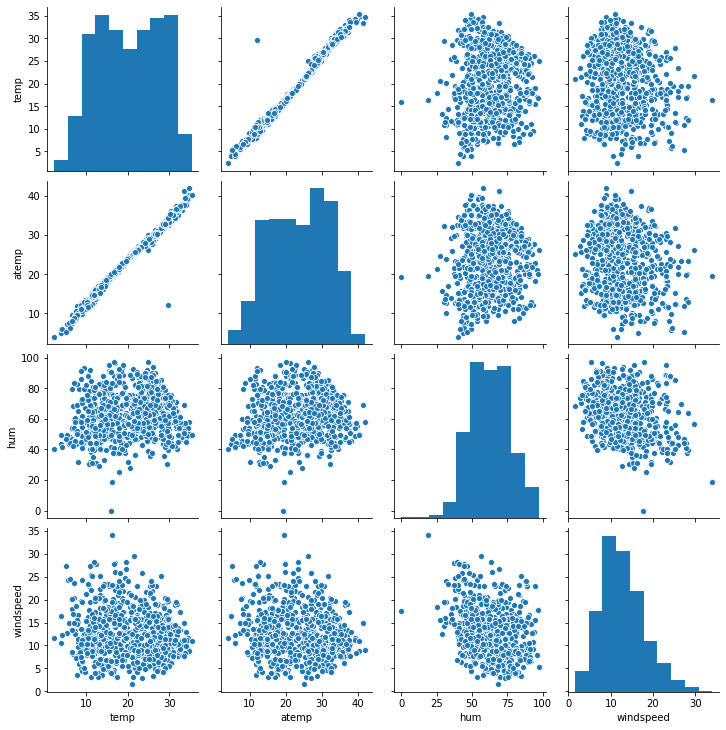

In [53]:
# Viewing the pairplot of the numerical columns:
sns.pairplot(bike_sharing_df[num_columns])
plt.show()

In [54]:
num_columns_corr = bike_sharing_df[num_columns].corr()
num_columns_corr

,temp,atemp,hum,windspeed
temp,1.000000,0.991696,0.128565,-0.158186
atemp,0.991696,1.000000,0.141512,-0.183876
hum,0.128565,0.141512,1.000000,-0.248506
windspeed,-0.158186,-0.183876,-0.248506,1.000000


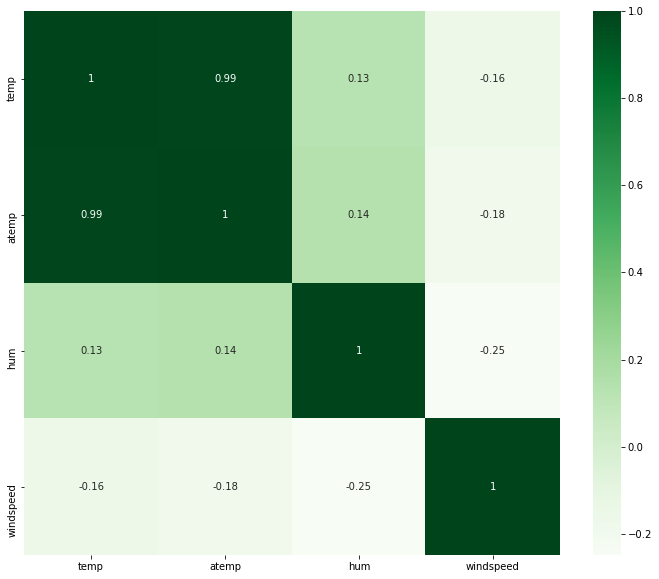

In [55]:
# Plotting the heat map for the numerical columns:
plt.figure(figsize = (12, 10))
sns.heatmap(num_columns_corr, annot = True, cmap = 'Greens')
plt.show()

In [56]:
# Viewing the top 5 rows of the categorical columns in the raw data frame 'bike_sharing_df':
bike_sharing_df[cat_columns].head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,1,0,1,0,1,1,2
1,1,0,1,0,2,1,2
2,1,0,1,0,3,1,1
3,1,0,1,0,4,1,1
4,1,0,1,0,5,1,1


In [57]:
cat_columns_corr = bike_sharing_df[cat_columns].corr()
cat_columns_corr

,season,yr,mnth,holiday,weekday,workingday,weathersit
season,1.000000e+00,-2.248195e-17,8.310321e-01,-0.010868,0.004012,0.017868,0.021306
yr,-2.248195e-17,1.000000e+00,-2.470170e-17,0.008195,0.000685,-0.011852,-0.050322
mnth,8.310321e-01,-2.470170e-17,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000


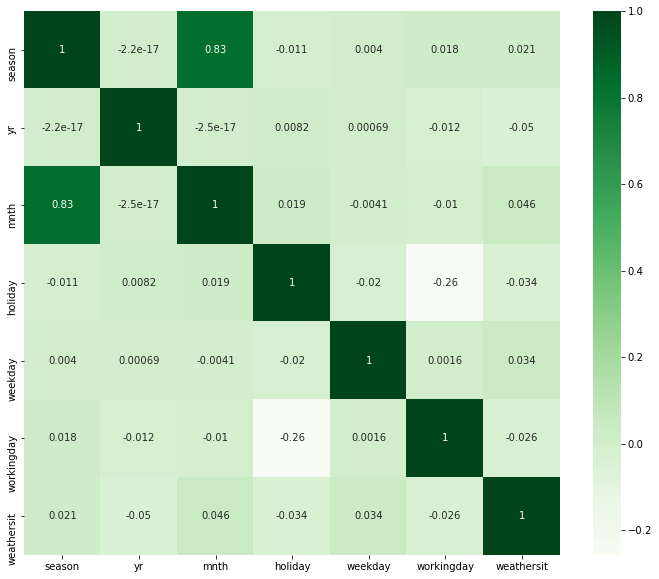

In [58]:
# Plotting the heat map for the categorical columns:
plt.figure(figsize = (12, 10))
sns.heatmap(cat_columns_corr, annot = True, cmap = 'Greens')
plt.show()

### Visualizing all the variables together in a heatmap

In [59]:
# Trying to make a combined pairplot of numerical and categorical columns might not make sense as there would be a large
# number of plots
# Let us plot a heatmap of the combined data, instead:

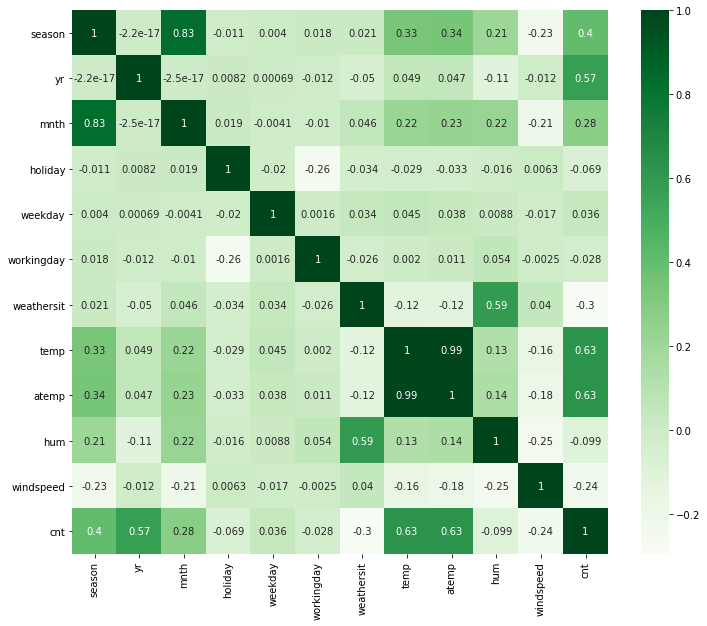

In [60]:
plt.figure(figsize = (12, 10))
sns.heatmap(bike_sharing_df.corr(), annot = True, cmap = 'Greens')
plt.show()

### Visualizing the categorical variables (with the help of box plots)

In [61]:
# It is already given that 'cnt' would be the dependent or target variable. So, it would always be on the y-axis in
# my analysis
# Let us put 'cnt' against the rest of the categorical columns
# cat_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
# dependent_var = ['cnt']

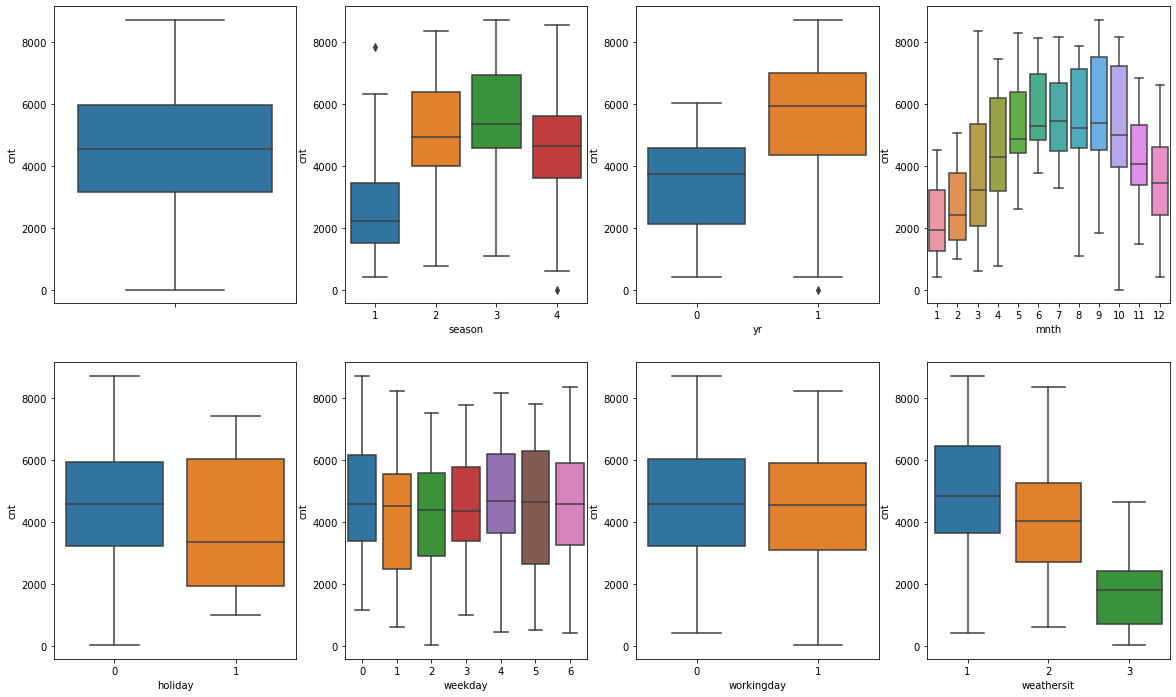

In [62]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_df)
plt.subplot(2,4,8)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_df)
plt.show()

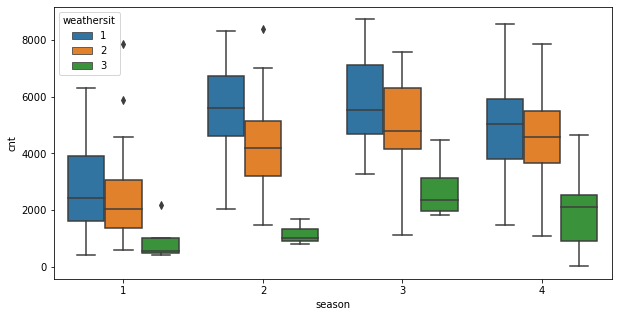

In [63]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = bike_sharing_df)
plt.show()

In [64]:
# Inference: As per the available data, we can clearly see that the count of total rental bikes 'cnt' is the highest when the
# weather is clear and its value has gone down the most when the weather condition becomes slightly adverse.

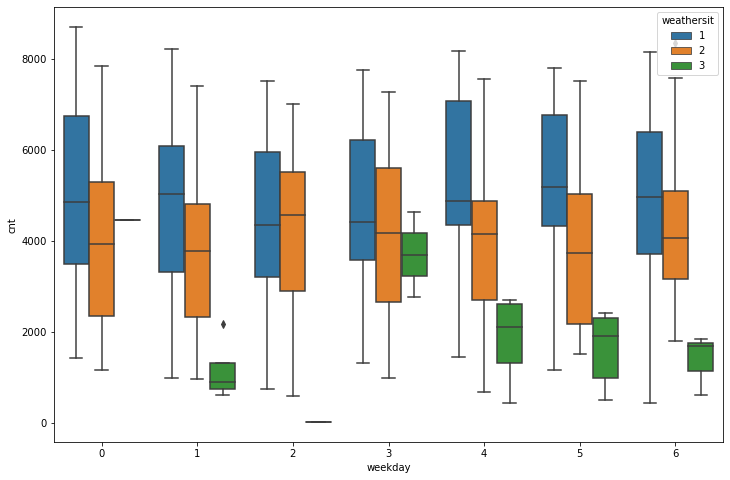

In [65]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'weekday', y = 'cnt', hue = 'weathersit', data = bike_sharing_df)
plt.show()

In [66]:
# As per the data, as compared to other week days, people were more prone to use the services on Wednesdays (3) the most, even
# when the weather conditions were slightly adverse.

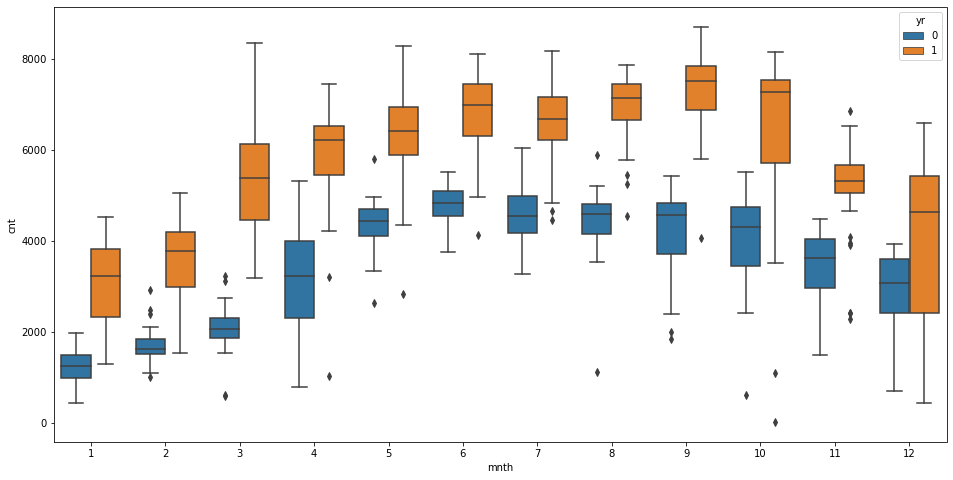

In [67]:
plt.figure(figsize = (16, 8))
sns.boxplot(x = 'mnth', y = 'cnt', hue = 'yr', data = bike_sharing_df)
plt.show()

In [68]:
# Highest monthly median in the year 2018 was observed in June. Whereas the same for 2019 was observed in September.

#### Univariate Outlier Analysis (on numerical columns)

In [69]:
# Let us again have a look at the first five rows of the raw data frame "bike_sharing_df" for our ready reference:

bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


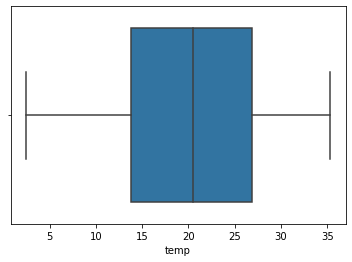

In [70]:
# Analysing the column 'temp' from the raw data frame 'bike_sharing_df':
sns.boxplot(bike_sharing_df['temp'])
plt.show()

In [71]:
# Simply visualizing this box plot does not reveal any outliers as such.So, I would not do the mathematical calculations
# involving IQR in this case.

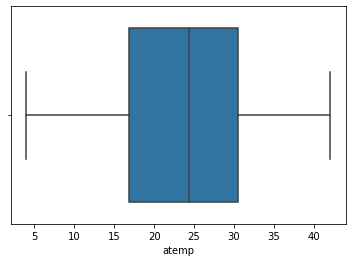

In [72]:
# Analysing the column 'atemp' from the raw data frame 'bike_sharing_df':
sns.boxplot(bike_sharing_df['atemp'])
plt.show()

In [73]:
# Simply visualizing this box plot does not reveal any outliers as such.So, I would not do the mathematical calculations
# involving IQR in this case.

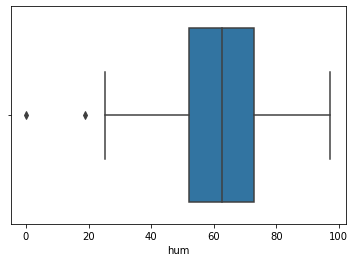

In [74]:
# Analysing the column 'hum' from the raw data frame 'bike_sharing_df':
sns.boxplot(bike_sharing_df['hum'])
plt.show()

In [75]:
# There are two values that are appearing below Q1. Let us do further mathematical analysis of outliers in this case:

# Calculating Quartile 1 for the values in the column 'hum' in the raw data frame 'bike_sharing_df':
Q1 = bike_sharing_df['hum'].quantile(0.25)

# Calculating Quartile 3 for the values in the column 'hum' in the raw data frame 'bike_sharing_df':
Q3 = bike_sharing_df['hum'].quantile(0.75)

# Calculating the Interquaritle range (IQR) for the values in the column 'hum' in the raw data frame 'bike_sharing_df':
IQR = Q3 - Q1
extreme_outliers_below_Q1 = Q1 - (3 * IQR)
print("Value before which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_below_Q1)
extreme_outliers_above_Q3 = Q3 + (3 * IQR)
print("Value after which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_above_Q3)

Value before which, the data points might be termed as 'Extreme Outliers' is : -10.968725000000006
Value after which, the data points might be termed as 'Extreme Outliers' is : 135.9583


In [76]:
# Both the values (before Q1) do not appear to be below the value of -10.97 (approx.) to be called as an outlier.
# There is no value that is visually appearing beyond Q3.

# Thus, in the case of 'hum' variable, there are no outliers present on the either side of the box plot, as far as univariate
# outlier analysis is concerned.

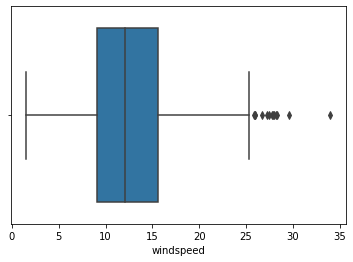

In [77]:
# Analysing the column 'windspeed' from the raw data frame 'bike_sharing_df':
sns.boxplot(bike_sharing_df['windspeed'])
plt.show()

In [78]:
# There are few values that are appearing above Q3. Let us do further mathematical analysis of outliers in this case:

# Calculating Quartile 1 for the values in the column 'windspeed' in raw data frame 'bike_sharing_df':
Q1 = bike_sharing_df['windspeed'].quantile(0.25)

# Calculating Quartile 3 for the values in the column 'windspeed' in raw data frame 'bike_sharing_df':
Q3 = bike_sharing_df['windspeed'].quantile(0.75)

# Calculating the Interquaritle range (IQR) for the values in the column 'windspeed' in the raw data frame 'bike_sharing_df':
IQR = Q3 - Q1
extreme_outliers_below_Q1 = Q1 - (3 * IQR)
print("Value before which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_below_Q1)
extreme_outliers_above_Q3 = Q3 + (3 * IQR)
print("Value after which, the data points might be termed as 'Extreme Outliers' is :", extreme_outliers_above_Q3)

Value before which, the data points might be termed as 'Extreme Outliers' is : -10.710167749999993
Value after which, the data points might be termed as 'Extreme Outliers' is : 35.37740699999999


In [79]:
# There is no value that is visually appearing before Q1.
# All the values (after Q3) do not appear to be above the value of 35.38 (approx.) to be called as an outlier.

# Thus, in the case of 'windspeed' variable, there are no outliers present on the either side of the box plot, as far as
# univariate outlier analysis is concerned.

#### Univariate Outlier Analysis (on the target/ dependent variable 'cnt')

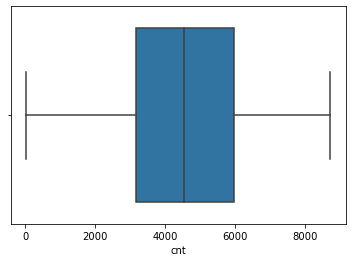

In [80]:
# Analysing the column 'cnt' from the raw data frame 'bike_sharing_df':
sns.boxplot(bike_sharing_df['cnt'])
plt.show()

In [81]:
# Here too, I do not see (visually) any anomally that can be worthy of further mathematical treatment to find out the
# value of outliers on the either side of the box plot.
# There are no outliers in this case too - on either side of the box plot - as far as univariate analysis is concerned.

## Step 3: Data Preparation

#### Creating dummy variables for the column 'season'

In [82]:
# Let us do the value_counts again on the 'season' column of the raw data frame 'bike_sharing_df':
bike_sharing_df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [83]:
Season = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
# Using the list comprehension and dictionary to convert the values of 'season' column from int to specific string values:
bike_sharing_df['season'] = [Season[item] for item in bike_sharing_df['season']]

In [84]:
bike_sharing_df['season'].head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object

In [85]:
bike_sharing_df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [86]:
# From the use of value_counts command and the data dictionary, we can see that the conversion has correctly taken place.

In [87]:
# Let me first create the dummy variables without using the "drop_first = True" command and then I would create the dummy
# variables using this command to answer the question number 2 in "Assignment based Subjective Questions":

status = pd.get_dummies(bike_sharing_df['season'])

In [88]:
status.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [89]:
# Interpretation of the dummy variables created (when 'drop_first = True' is not used) to replace the 'season' column in the
# data frame 'bike_sharing_df':

# '1000' = fall
# '0001' = winter
# '0010' = summer
# '0100' = spring

In [90]:
# As we see that the first variable is not really needed. Moreover, as a rule of thumb, we usually take the number of
# dummy variables to be 1 less than the number of levels in the column.
# Thus, I would be dropping the first column and then specifying how to interpret the values of the dummy variables
# that we would get eventually

In [91]:
status = pd.get_dummies(bike_sharing_df['season'], drop_first = True)

In [92]:
status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [93]:
# Interpretation of the dummy variables created to replace the 'season' column in the data frame 'bike_sharing_df':

# '000' = fall
# '001' = winter
# '010' = summer
# '100' = spring

In [94]:
# Add the results to the original 'bike_sharing_df' data frame:
bike_sharing_df = pd.concat([bike_sharing_df, status], axis = 1)

In [95]:
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [96]:
# Drop the column 'season' as we have created the dummy variables for it:
bike_sharing_df.drop(['season'], axis = 1, inplace = True)

In [97]:
# Viewing the top 5 rows after dropping the 'season' column:
bike_sharing_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


#### Creating dummy variables for the column 'weathersit'
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [98]:
bike_sharing_df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [99]:
# As we have seen in the "Reading and Understanding data" section, there are only 3 unique values in the 'weathersit'
# column. There is no value '4' in this column. Moreover, MLR (Multiple Linear Regression) cannot be used for extrapolation.

# Thus,I would be ignoring it (value '4') while creating the dictionary in the code block immediately below the current one:

In [100]:
# I have abbreviated the terms for brevity and ease of use:
Weather = {1: 'Clear', 2: 'Mist', 3: 'Light Rain'}
# Using the list comprehension and dictionary to convert the values of 'weathersit' column from int to specific string values:
bike_sharing_df['weathersit'] = bike_sharing_df['weathersit'].map(Weather)

In [101]:
bike_sharing_df['weathersit'].head()

0     Mist
1     Mist
2    Clear
3    Clear
4    Clear
Name: weathersit, dtype: object

In [102]:
bike_sharing_df['weathersit'].value_counts()

Clear         463
Mist          246
Light Rain     21
Name: weathersit, dtype: int64

In [103]:
# From the use of value_counts command and the data dictionary, we can see that the conversion has correctly taken place.

In [104]:
# Since there are only 3 values (1, 2 and 3) in the given data set, we can use only 2 columns for dummy variables:
status = pd.get_dummies(bike_sharing_df['weathersit'], drop_first = True)

In [105]:
status.head()

,Light Rain,Mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [106]:
# Interpretation of the dummy variables for the 'weathersit' column:

# '01' = Mist
# '10' = Light Rain
# '00' = Clear

In [107]:
# Add the results to the bike_sharing_df' data frame
bike_sharing_df = pd.concat([bike_sharing_df, status], axis = 1)

In [108]:
bike_sharing_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Rain,Mist
0,0,1,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [109]:
# Drop the column 'weathersit' as we have created the dummies for it:
bike_sharing_df.drop(['weathersit'], axis = 1, inplace = True)

In [110]:
bike_sharing_df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Rain,Mist
0,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [111]:
bike_sharing_df.shape

(730, 15)

#### Creating a new data frame "bike_sharing_df2":

In [112]:
# Creating a new data frame to accommodate more dummy variables
# It is safe for me to create an exact copy of the data frame and then work on the new copy instead
bike_sharing_df2 = bike_sharing_df.copy()
bike_sharing_df2.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Rain,Mist
0,0,1,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,1,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,1,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,1,0,4,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,1,0,5,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [113]:
bike_sharing_df2.shape

(730, 15)

#### Creating dummy variables for the column 'weekday'

In [114]:
bike_sharing_df2['weekday'].value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [115]:
# Let us use the map function here
Weekday = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
# Using the combination of dictionary 'Weekday' and map function here:
bike_sharing_df2['weekday'] = bike_sharing_df2['weekday'].map(Weekday)

In [116]:
bike_sharing_df2['weekday'].head()

0       Monday
1      Tuesday
2    Wednesday
3     Thursday
4       Friday
Name: weekday, dtype: object

In [117]:
bike_sharing_df2['weekday'].value_counts()

Tuesday      105
Monday       105
Sunday       104
Friday       104
Wednesday    104
Saturday     104
Thursday     104
Name: weekday, dtype: int64

In [118]:
# From the use of value_counts command and the data dictionary, we can see that the conversion has correctly taken place.

In [119]:
status = pd.get_dummies(bike_sharing_df2['weekday'], drop_first = True)

In [120]:
status.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [121]:
# Way to interpret these dummy variables created for the 'weekday' variable:
# '000000' = 'Friday'
# '000001' = 'Wednesday'
# '000010' = 'Tuesday'
# '000100' = 'Thursday'
# '001000' = 'Sunday'
# '010000' = 'Saturday'
# '100000' = 'Monday'

In [122]:
# Add the results to the 'bike_sharing_df2' data frame

bike_sharing_df2 = pd.concat([bike_sharing_df2, status], axis = 1)

In [123]:
bike_sharing_df2.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,summer,winter,Light Rain,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,Monday,1,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,1,1,0,0,0,0,0
1,0,1,0,Tuesday,1,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,Wednesday,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,Thursday,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,Friday,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [124]:
# Drop the column 'weekday' as we have created the dummies for it:

bike_sharing_df2.drop(['weekday'], axis = 1, inplace = True)

In [125]:
bike_sharing_df2.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Light Rain,Mist,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,1,0,0,0,0,0
1,0,1,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,1,0
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,1
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0


#### Creating dummy variables for the column 'mnth'

In [126]:
bike_sharing_df2['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [127]:
Month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov',
         12: 'Dec'}
# Again, using the combination of the dictionary 'Month' and the map function:
bike_sharing_df2['mnth'] = bike_sharing_df2['mnth'].map(Month)

In [128]:
bike_sharing_df2['mnth'].head()

0    Jan
1    Jan
2    Jan
3    Jan
4    Jan
Name: mnth, dtype: object

In [129]:
bike_sharing_df2['mnth'].value_counts()

Jul    62
Dec    62
Jan    62
Aug    62
Mar    62
Oct    62
May    62
Nov    60
Jun    60
Apr    60
Sep    60
Feb    56
Name: mnth, dtype: int64

In [130]:
# From the use of value_counts command and the data dictionary, we can see that the conversion has correctly taken place.

In [131]:
status = pd.get_dummies(bike_sharing_df2['mnth'], drop_first = True)

In [132]:
status.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [133]:
# Way to interprete these dummy variables:
# '00000000000': 'April'
# '00000000001': 'September'
# '00000000010': 'October'
# '00000000100': 'November'
# '00000001000': 'May'
# '00000010000': 'March'
# '00000100000': 'June'
# '00001000000': 'July'
# '00010000000': 'January'
# '00100000000': 'February'
# '01000000000': 'December'
# '10000000000': 'August'

In [134]:
# Add the results to the 'bike_sharing_df2' data frame

bike_sharing_df2 = pd.concat([bike_sharing_df2, status], axis = 1)

In [135]:
bike_sharing_df2.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,Jan,0,1,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,1,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [136]:
# Drop the column 'weekday' as we have created the dummies for it:

bike_sharing_df2.drop(['mnth'], axis = 1, inplace = True)

In [137]:
bike_sharing_df2.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [138]:
# Checking the shape of the final data frame 'bike_sharing_df2' before proceeding to the train-test split:
bike_sharing_df2.shape

(730, 30)

In [139]:
# Checking the info of the final data frame 'bike_sharing_df2' before proceeding to the train-test split:# Checking the info of the final data frame 'bike_sharing_df2' before proceeding to the train-test split:
bike_sharing_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  Light Rain  730 non-null    uint8  
 12  Mist        730 non-null    uint8  
 13  Monday      730 non-null    uint8  
 14  Saturday    730 non-null    uint8  
 15  Sunday      730 non-null    uint8  
 16  Thursday    730 non-null    uint8  
 17  Tuesday     730 non-null    uint8  
 18  Wednesday   730 non-null    uint8  
 19  Aug         730 non-null    u

## Step 4: Splitting the Data into Training and Testing Sets

In [140]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing_df2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [141]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,0,0,0,0


In [142]:
df_train.shape

(510, 30)

In [143]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,0,1,0,0,0,0,0


In [144]:
df_test.shape

(219, 30)

### Rescaling the features

In [145]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
scaler = MinMaxScaler()

In [147]:
# Apply scaler() to all the columns in the train data set except the '0-1' and the 'dummy' variables:

df_train[num_columns] = scaler.fit_transform(df_train[num_columns])

In [148]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1796,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,...,0,0,0,0,0,0,0,0,0,0


In [149]:
df_train.shape

(510, 30)

In [150]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,4486.382353,0.243137,0.245098,...,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,1952.158739,0.429398,0.430568,...,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [151]:
# We can observe that the min values in all the columns (except cnt) are 0 and the max values in all the columns (except cnt)
# are 1. This means that our MinMax scaling has worked well.

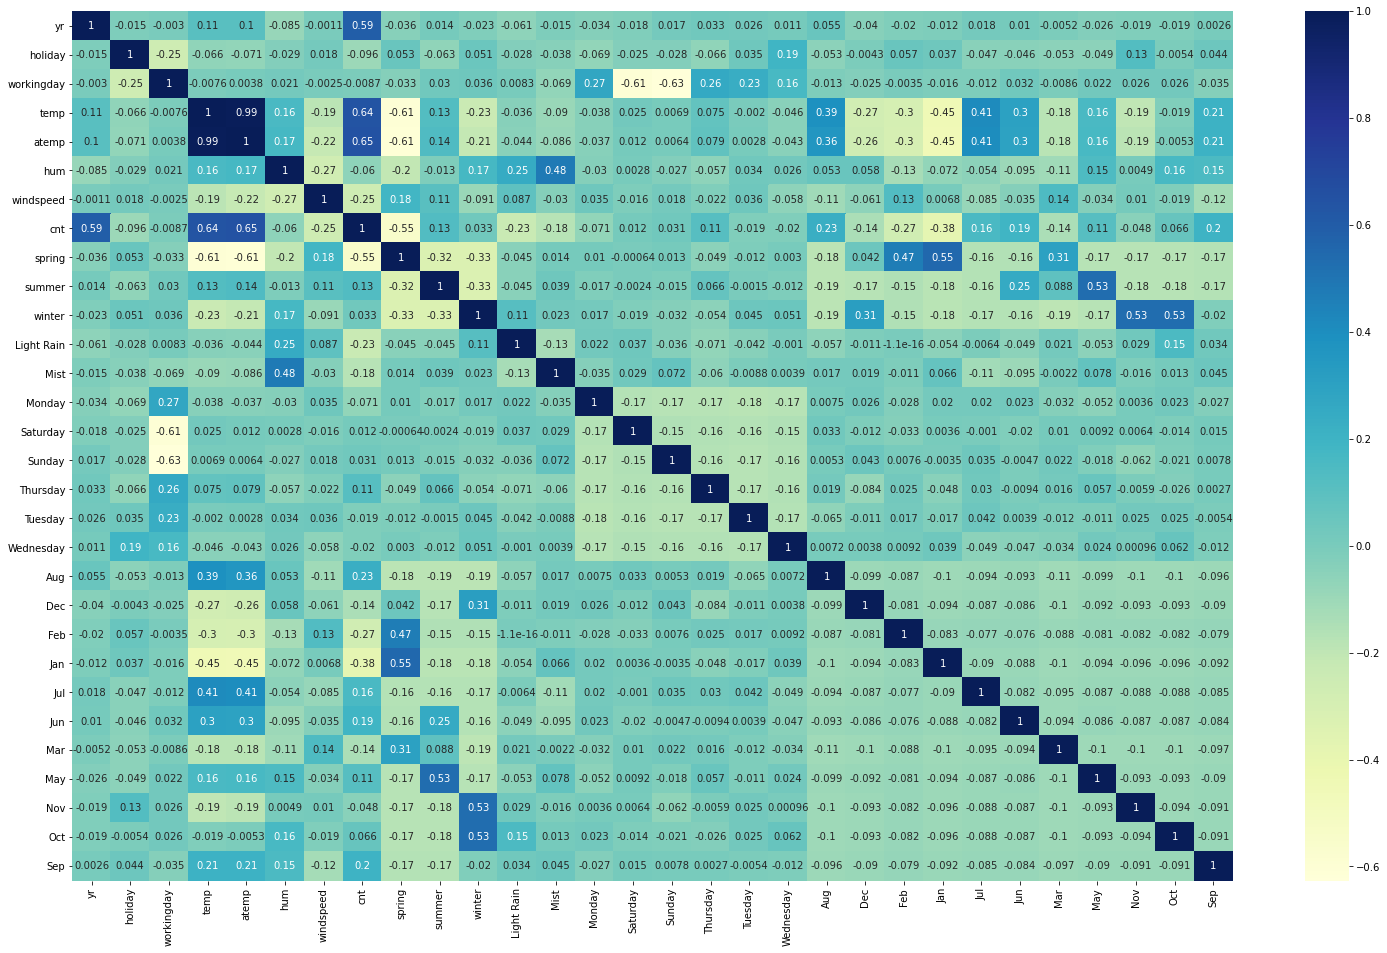

In [152]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26, 16))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [153]:
# We would need to make the comparison between the target variable 'cnt' and other variables. 
# It can be done from the previous heatmap too but re-adjusting for the ease of interpretation.
# Thus, we would need to bring the column 'cnt' to the first position in the train as well as test data sets

CNT = df_train['cnt']
df_train.drop(labels = ['cnt'], axis=1, inplace = True)
df_train.insert(0, 'cnt', CNT)
df_train.head()

,cnt,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,7534,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,...,0,0,0,0,0,0,0,0,1,0
576,7216,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,...,0,0,0,1,0,0,0,0,0,0
426,4066,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1796,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,...,1,0,0,0,0,0,0,0,0,0
482,4220,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,...,0,0,0,0,0,0,0,0,0,0


In [154]:
CNT = df_test['cnt']
df_test.drop(labels = ['cnt'], axis=1, inplace = True)
df_test.insert(0, 'cnt', CNT)
df_test.head()

,cnt,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,6043,0,1,0,29.793347,33.27085,63.7917,5.459106,0,0,...,0,0,0,1,0,0,0,0,0,0
535,6211,1,0,1,32.082500,36.04875,59.2083,7.625404,0,1,...,0,0,0,0,1,0,0,0,0,0
299,2659,0,0,0,19.270000,22.85230,81.2917,13.250121,0,0,...,0,0,0,0,0,0,0,0,1,0
221,4780,0,0,1,31.433347,34.24915,42.4167,13.417286,0,0,...,0,0,0,0,0,0,0,0,0,0
152,4968,0,0,0,29.315000,32.19710,30.5000,19.583229,0,1,...,0,0,0,0,1,0,0,0,0,0


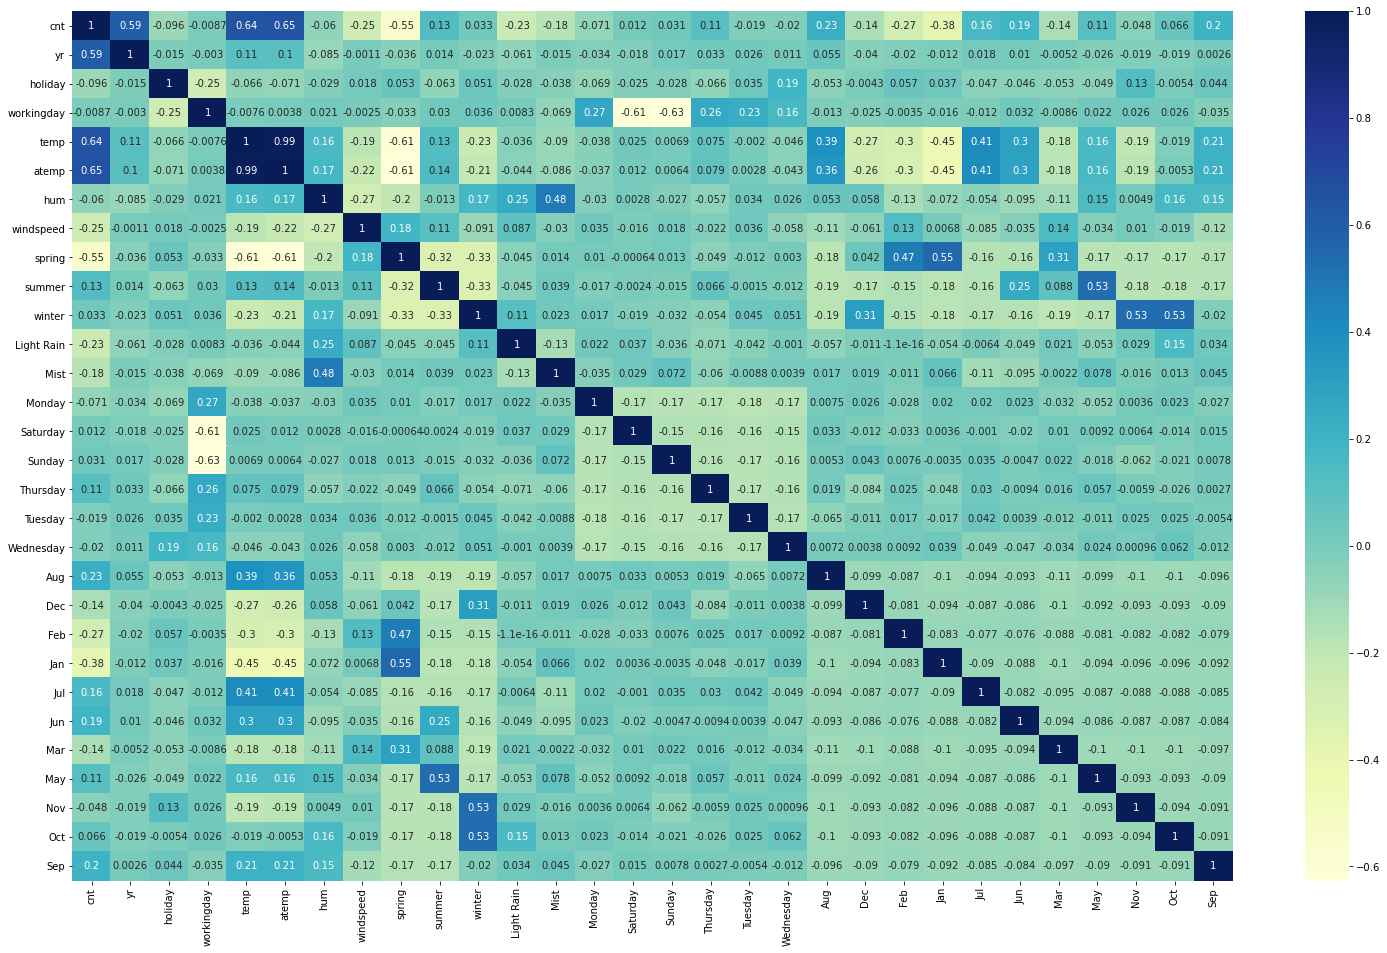

In [155]:
# Now, let us plot the heatmap again to see which variables are highly correlated with our dependent or target variable 'cnt':

plt.figure(figsize = (26, 16))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

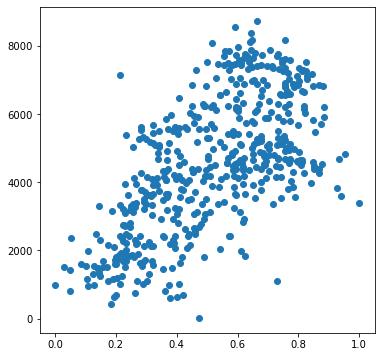

In [156]:
# As we can see, 'atemp' seems to the correlated to 'cnt' the most. Let's see a pairplot for 'atemp' vs cnt:

plt.figure(figsize = [6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

In [157]:
# So, we pick 'atemp' as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [158]:
y_train = df_train.pop('cnt')
X_train = df_train

In [159]:
# Viewing the first five rows of the new data frame 'X_train':
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [160]:
# Checking the shape of the new data frame 'X_train':
X_train.shape

(510, 29)

In [161]:
# Viewing the first five rows of the new Pandas Series 'y_train':
y_train.head()

653    7534
576    7216
426    4066
728    1796
482    4220
Name: cnt, dtype: int64

In [162]:
# Checking the shape of the new Pandas Series 'y_train':
y_train.shape

(510,)

## Step 5: Building a linear model

### Model 1

In [163]:
# Initially, I am going to use the forward selection method to build the ML Model:

# Importing the relevant module from the statsmodels library
import statsmodels.api as sm

# Adding a constant to the Pandas Series "X_train['atemp']" and assigning the output to a new data frame 'X_train_lm':
X_train_lm = sm.add_constant(X_train[['atemp']])

# Viewing the top five rows of the data frame 'X_train_lm':
X_train_lm.head()

,const,atemp
653,1.0,0.501133
576,1.0,0.766351
426,1.0,0.438975
728,1.0,0.200348
482,1.0,0.391735


In [164]:
# Create a first fitted model 'lr1':
lr1 = sm.OLS(y_train, X_train_lm).fit()

In [165]:
# Check the parameters obtained
lr1.params

const    1438.132256
atemp    5942.135000
dtype: float64

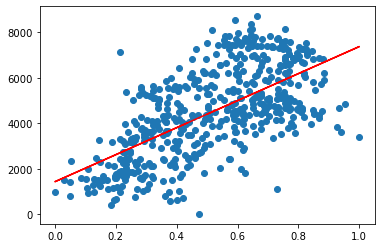

In [166]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 1438.132 + 5942.135*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [167]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           1.10e-61
Time:                        18:17:47   Log-Likelihood:                -4449.3
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     508   BIC:                             8911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1438.1323    172.721      8.326      0.0

### Model 2

In [168]:
# Let us use the second most correlated variable 'temp' in combination with 'atemp' against the dependent variable 'cnt':

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp', 'temp']])
X_train_lm.head()

,const,atemp,temp
653,1.0,0.501133,0.509887
576,1.0,0.766351,0.815169
426,1.0,0.438975,0.442393
728,1.0,0.200348,0.245101
482,1.0,0.391735,0.395666


In [169]:
# Create a fitted model
lr2 = sm.OLS(y_train, X_train_lm).fit()

In [170]:
# Check the parameters obtained
lr2.params

const    1442.125227
atemp    4279.211038
temp     1580.361458
dtype: float64

In [171]:
# Check the summary
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     182.5
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           1.95e-60
Time:                        18:17:47   Log-Likelihood:                -4449.0
No. Observations:                 510   AIC:                             8904.
Df Residuals:                     507   BIC:                             8917.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1442.1252    172.864      8.343      0.0

In [172]:
# Here, we see that the p-value of the variable 'temp' is high, indicating that this variable is insignificant.
# Also, we see that though the value of R-Squared has increased marginally from 0.418 to 0.419, the value of adjusted
# R squared has gone down marginally from 0.417 to 0.416
# Let us see what happens if we use only the 'temp' variable in model 3.

### Model 3

In [173]:
# Evaluating with the predictor variable 'temp' only:

# Add a constant
X_train_lm = sm.add_constant(X_train['temp'])
X_train_lm.head()

,const,temp
653,1.0,0.509887
576,1.0,0.815169
426,1.0,0.442393
728,1.0,0.245101
482,1.0,0.395666


In [174]:
# Create a fitted model
lr3 = sm.OLS(y_train, X_train_lm).fit()

In [175]:
# Check the parameters obtained
lr3.params

const    1497.882426
temp     5562.458744
dtype: float64

In [176]:
# Check the summary
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           5.80e-61
Time:                        18:17:47   Log-Likelihood:                -4450.9
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1497.8824    171.056      8.757      0.0

In [177]:
# We can see that the p-value of the temp variable is zero, indicating that it is a significant variable.
# Since there is not a significant different between the R-squared and adjusted R-squared values of 'temp' and 'atemp',
# I would be using 'temp' and 'yr' variables to build model 4.

### Model 4

In [178]:
# Considering another variable 'yr' along with 'temp':

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp', 'yr']])
X_train_lm.head()

,const,temp,yr
653,1.0,0.509887,1
576,1.0,0.815169,1
426,1.0,0.442393,1
728,1.0,0.245101,1
482,1.0,0.395666,1


In [179]:
# Create a fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [180]:
# Check the parameters obtained
lr.params

const     714.129738
temp     5072.292387
yr       2061.858406
dtype: float64

In [181]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     564.9
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          9.25e-130
Time:                        18:17:48   Log-Likelihood:                -4288.4
No. Observations:                 510   AIC:                             8583.
Df Residuals:                     507   BIC:                             8596.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        714.1297    129.839      5.500      0.0

In [182]:
# The value of R-squared jumped from 0.414 (in model 3) to 0.690 (in model 4)
# The value of Adjusted R-Squared also jumped from 0.413 (in model 3) to 0.689 (in model 4)
# p value of all the variables is 0, thus the two variables (temp and yr) are significant

#### Calculating the VIF for the predictor variables 'temp' and 'yr':

In [183]:
# Importing the relevant libraries for the calculation of VIF:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [184]:
X = X_train_lm.drop(['const'], axis = 1)
X.head()

,temp,yr
653,0.509887,1
576,0.815169,1
426,0.442393,1
728,0.245101,1
482,0.395666,1


In [185]:
X.shape

(510, 2)

In [186]:
X.columns

Index(['temp', 'yr'], dtype='object')

In [187]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,1.89
1,yr,1.89


In [188]:
# We can observe that the values of VIF for both the predictor variables is low.

#### Model 5

In [189]:
# Apart from these variables(temp, atemp and yr), we can observe from the heatmap that the dependent variable does not have
# significant correlation with other predictor variables. Thus, I would rather use an automated approach here. Since the number
# of predictor variables in the data frame 'X_train' is 29 and the value of n in RFE is arbitrary, let us first choose n to be
# 29.

In [190]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [191]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 29)
rfe = rfe.fit(X_train, y_train)

In [192]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Rain', True, 1),
 ('Mist', True, 1),
 ('Monday', True, 1),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', True, 1),
 ('Tuesday', True, 1),
 ('Wednesday', True, 1),
 ('Aug', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', True, 1),
 ('Mar', True, 1),
 ('May', True, 1),
 ('Nov', True, 1),
 ('Oct', True, 1),
 ('Sep', True, 1)]

In [193]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Rain', 'Mist', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [194]:
col.value_counts().sum()

29

In [195]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [196]:
#### Building model using statsmodel, based on the information obtained after performing RFE on the X_Train data set

In [197]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_model_5 = X_train[col]

In [198]:
X_train_rfe_model_5.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
X_train_rfe_model_5.shape

(510, 29)

In [200]:
# Adding a constant variable 
X_train_rfe_model_5 = sm.add_constant(X_train_rfe_model_5)

In [201]:
X_train_rfe_model_5.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
653,1.0,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1.0,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1.0,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1.0,1,0,1,0.245101,0.200348,0.498067,0.663106,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,...,0,0,0,0,0,0,0,0,0,0


In [202]:
X_train_rfe_model_5.shape

(510, 30)

In [203]:
lm = sm.OLS(y_train,X_train_rfe_model_5).fit()   # Running the linear model

In [204]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     94.48
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          4.09e-178
Time:                        18:17:49   Log-Likelihood:                -4101.9
No. Observations:                 510   AIC:                             8264.
Df Residuals:                     480   BIC:                             8391.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3453.2947    739.849      4.668      0.0

In [205]:
X = X_train_rfe_model_5.drop(['const'], axis = 1)

In [206]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Rain', 'Mist', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [207]:
# Let us do a VIF test also:

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,442.82
4,atemp,382.51
2,workingday,63.90
5,hum,41.21
7,spring,13.56
9,winter,12.53
14,Sunday,12.35
13,Saturday,11.84
8,summer,9.87
26,Nov,7.16


In [208]:
# The value of R-squared of model 5 is 0.851
# The value of adjusted R-Squared of model 5 is 0.842

In [209]:
# Let us now reduce the number of predictor variables in the RFE technique to 15 and compare the values of R-Squared
# and adjusted R-squared of models 5 and 6

#### Model 6

In [210]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [211]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Light Rain', True, 1),
 ('Mist', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1)]

In [212]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Light Rain', 'Mist', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')

In [213]:
col.value_counts().sum()

15

In [214]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct'],
      dtype='object')

In [215]:
X_train.columns[~rfe.support_].value_counts().sum()

14

In [216]:
#### Building model using statsmodel, based on the information obtained after performing RFE on the X_Train data set

In [217]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe_model_6 = X_train[col]

In [218]:
# Adding a constant variable 
X_train_rfe_model_6 = sm.add_constant(X_train_rfe_model_6)

In [219]:
X_train_rfe_model_6.head()

,const,yr,holiday,temp,hum,windspeed,spring,summer,winter,Light Rain,Mist,Dec,Jan,Jul,Nov,Sep
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0


In [220]:
X_train_rfe_model_6.shape

(510, 16)

In [221]:
lm = sm.OLS(y_train, X_train_rfe_model_6).fit()   # Running the linear model

In [222]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          3.34e-189
Time:                        18:17:50   Log-Likelihood:                -4111.1
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     494   BIC:                             8322.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2805.5562    313.247      8.956      0.0

In [223]:
# We can see that the p-values of all the predictor variables is low (less than 0.05), indicating that all of these
# variables are significant

In [224]:
X = X_train_rfe_model_6.drop(['const'], axis = 1)

In [225]:
X.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Light Rain', 'Mist', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')

In [226]:
# Let us do a VIF test

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
9,Mist,2.32
0,yr,2.09
13,Nov,1.83
11,Jan,1.75


In [227]:
# The VIF values of the variables 'hum' and 'temp' are high (greater than 5), let us drop 'hum' and re-build the model without
# it

In [228]:
# R-Squared for model 5 is 0.851 and for model 6, it is 0.845. That is a difference of 0.006 or 0.6%.
# Adjusted R-squared for model 5 is 0.842 and that of model 6 is 0.841. That is a difference of 0.001 or 0.1%.

# We can see that there is negligible drop in the value of adjusted R-squared between models 5 and 6 (0.001).
# Thus, I assume that I am on the right track and I will continue with what I have mentioned in the code block just above
# the current one.

#### Model 7

In [229]:
X.head()

,yr,holiday,temp,hum,windspeed,spring,summer,winter,Light Rain,Mist,Dec,Jan,Jul,Nov,Sep
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0


In [230]:
X.shape

(510, 15)

In [231]:
# Dropping the variable 'hum' (as its VIF was 30.94 at the end of model 6):
X_train_model_7 = X.drop(["hum"], axis = 1)

In [232]:
# Viewing the top 5 rows of the data frame 'X_train_model_7':
X_train_model_7.head()

,yr,holiday,temp,windspeed,spring,summer,winter,Light Rain,Mist,Dec,Jan,Jul,Nov,Sep
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.255342,1,0,0,0,1,0,0,0,0,0
728,1,0,0.245101,0.663106,1,0,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,1,0,0,0,0,0


In [233]:
# Checking the shape of the data frame 'X_train_model_7':
X_train_model_7.shape

(510, 14)

In [234]:
# Adding a constant variable to the data frame 'X_train_model_7':
X_train_rfe_model_7 = sm.add_constant(X_train_model_7)

In [235]:
# Viewing the top 5 rows of the data frame 'X_train_model_7' again (after the addition of the constant):
X_train_rfe_model_7.head()

,const,yr,holiday,temp,windspeed,spring,summer,winter,Light Rain,Mist,Dec,Jan,Jul,Nov,Sep
653,1.0,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,1,0,0,0,0,0
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,1,0,0,1,0,0,0,0,0


In [236]:
# Checking the shape of the data frame 'X_train_model_7' again (after the addition of the constant):
X_train_rfe_model_7.shape

(510, 15)

In [237]:
lm = sm.OLS(y_train, X_train_rfe_model_7).fit()   # Running the linear model

In [238]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          1.57e-186
Time:                        18:17:51   Log-Likelihood:                -4120.2
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     495   BIC:                             8334.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2165.7529    279.173      7.758      0.0

In [239]:
# We see that the p values for all the variables is less than 0.05. Let us calculate the VIF

In [240]:
X = X_train_rfe_model_7.drop(['const'], axis = 1)

In [241]:
X.head()

,yr,holiday,temp,windspeed,spring,summer,winter,Light Rain,Mist,Dec,Jan,Jul,Nov,Sep
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.255342,1,0,0,0,1,0,0,0,0,0
728,1,0,0.245101,0.663106,1,0,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,1,0,0,0,0,0


In [242]:
X.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'Light Rain', 'Mist', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')

In [243]:
# Let us do a VIF test

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
12,Nov,1.80
10,Jan,1.66
11,Jul,1.59
8,Mist,1.56


In [244]:
# In my opinion, temp is an important variable and dropping it would affect the values of R-Squared and adjusted R-squared.
# If that happens then I would proceed with model 7 in to the residual analysis (as the p -values of all the variables is
# below zero and VIF of only 'temp' is slightly above 5).

#### Model 8

In [245]:
# Dropping the 'temp' variable from the data frame 'X' and assigning the output to a new data frame 'X_train_model_8':
X_train_model_8 = X.drop(["temp"], axis = 1)

In [246]:
# Viewing the top 5 rows of the data frame 'X_train_model_8':
X_train_model_8.head()

,yr,holiday,windspeed,spring,summer,winter,Light Rain,Mist,Dec,Jan,Jul,Nov,Sep
653,1,0,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.264686,0,0,0,0,0,0,0,1,0,0
426,1,0,0.255342,1,0,0,0,1,0,0,0,0,0
728,1,0,0.663106,1,0,0,0,0,1,0,0,0,0
482,1,0,0.188475,0,1,0,0,1,0,0,0,0,0


In [247]:
# Checking the shape of the data frame 'X_train_model_8':
X_train_model_8.shape

(510, 13)

In [248]:
# Adding a constant variable to the data frame 'X_train_model_8' and assigning the output to a new data frame
# 'X_train_rfe_model_8':

X_train_rfe_model_8 = sm.add_constant(X_train_model_8)

In [249]:
# Viewing the first 5 rows of the data frame 'X_train_rfe_model_8':
X_train_rfe_model_8.head()

,const,yr,holiday,windspeed,spring,summer,winter,Light Rain,Mist,Dec,Jan,Jul,Nov,Sep
653,1.0,1,0,0.300794,0,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.264686,0,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0.255342,1,0,0,0,1,0,0,0,0,0
728,1.0,1,0,0.663106,1,0,0,0,0,1,0,0,0,0
482,1.0,1,0,0.188475,0,1,0,0,1,0,0,0,0,0


In [250]:
# Checking the shape of the data frame 'X_train_rfe_model_8':
X_train_rfe_model_8.shape

(510, 14)

In [251]:
lm8 = sm.OLS(y_train, X_train_rfe_model_8).fit()   # Running the linear model

In [252]:
#Let's see the summary of our linear model 'lm8':
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Mon, 05 Apr 2021   Prob (F-statistic):          5.50e-160
Time:                        18:17:52   Log-Likelihood:                -4186.1
No. Observations:                 510   AIC:                             8400.
Df Residuals:                     496   BIC:                             8459.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5203.6812    137.967     37.717      0.0

In [253]:
# The value of R-sqaured dropped from 0.840 (in model 7) to 0.793 (in model 8). That is a difference of 0.047 or 4.7m%!
# The value of adjusted R-squared fell from 0.835 (in model 7) to 0.787 (in model 8). That is a difference of 0.048 or 4.8%!

# Since the difference of R-squared and adjusted R-squared is significant between models 7 and 8, I would be proceeding
# to the residual analysis with model 7 to ensure that it is reliable.

### Step 6: Residual Analysis of the train data

In [254]:
# Calculating the predicted values of y:
y_train_pred = lm.predict(X_train_rfe_model_7)

In [255]:
# Viewing the top 5 rows of the predicted values of y:
y_train_pred.head()

653    6497.750313
576    6500.417509
426    4202.494264
728    3210.713691
482    5028.808914
dtype: float64

In [256]:
# Viewing the shape of the Pandas Series 'y_train_pred' (the predicted values of y):
y_train_pred.shape

(510,)

In [257]:
# Calculating the value of residuals/ error terms:
res = y_train - y_train_pred

# Viewing the top 5 rows of the residuals/ erros:
res.head()

653    1036.249687
576     715.582491
426    -136.494264
728   -1414.713691
482    -808.808914
dtype: float64

In [258]:
# Viewing the shape of the Pandas Series 'res' (the residuals or errors):
res.shape

(510,)

Text(0.5, 0, 'Errors')

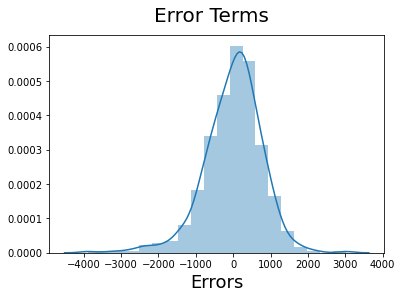

In [259]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [260]:
# As per the above graph, the error terms are distributed normally with mean = 0
# Thus, our assumption regarding the residuals holds true

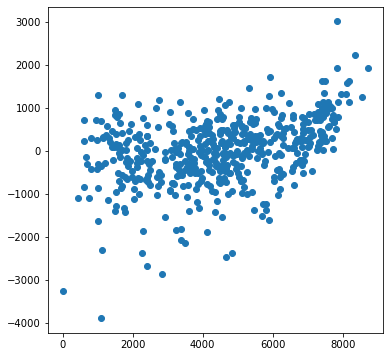

In [288]:
# Checking another assumption: If the error terms are independent of each other:

plt.figure(figsize = [6,6])
plt.scatter(y_train, res)
plt.show()

In [ ]:
# The error terms are distributed almost equally around zero and there appears to be no pattern in them. Apart from few
# points in the beginning and at the end, the variance is not much as well.

### Step 7: Making Predictions

In [261]:
# num_columns = ['temp', 'atemp', 'hum', 'windspeed'] --> This has been already defined earlier
df_test[num_columns] = scaler.transform(df_test[num_columns])

In [262]:
df_test.describe()

,cnt,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,4546.981735,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.255708,0.264840,...,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758
std,1898.633630,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.437258,0.442259,...,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125
min,441.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3303.500000,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4579.000000,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5869.500000,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8395.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [263]:
# The min values are close to 0 and the max values are close to 1. They are not exactly 0 and 1 respectively because the scaler
# was fit on the training data set & the minimum (Xmin) and maximum (Xmax) values the transformer is using in this case
# are actually corresponding to the training set. Here, I have only transformed the test set using those min and max values.

# Transform on the test set has used the formula (X - Xmin)/(Xmax - Xmin) using the Xmin and Xmax values obtained after
# fitting and transforming on the training set.

# Note: 'cnt' is the predictor variable and I had not scaled it earlier. (It is not the part of the num_columns list)

#### Dividing into X_test and y_test

In [264]:
y_test = df_test.pop('cnt')
X_test = df_test

In [265]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [266]:
X_test.shape

(219, 29)

In [267]:
y_test.head()

184    6043
535    6211
299    2659
221    4780
152    4968
Name: cnt, dtype: int64

In [268]:
y_test.shape

(219,)

In [269]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'Light Rain', 'Mist', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')

In [270]:
# We can see that the data frame 'X_Test' had these columns (their count: 29)

In [271]:
X.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'Light Rain', 'Mist', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep'],
      dtype='object')

In [272]:
# The columns of the data frame 'X' from model 7 had these columns (their count: 14)

#### Now let's use our model to make predictions.

In [273]:
# Creating 'X_test_m7' dataframe by dropping the 15 least useful variables from 'X_test' data frame (as they are not present 
# in the model 7 - my final model):
X_test_m7 = X_test[X.columns]

# Adding a constant variable to the test data frame 'X_test_m7':
X_test_m7 = sm.add_constant(X_test_m7)

# Note: Here, I have used 'm7' as a symbolic way to tell myself that model 7 is the final model, which I am using to make
# predictions on the test data set

In [274]:
X_test_m7.head()

,const,yr,holiday,temp,windspeed,spring,summer,winter,Light Rain,Mist,Dec,Jan,Jul,Nov,Sep
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1,0,0,1,0,0
535,1.0,1,0,0.901354,0.153728,0,1,0,0,0,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,1,0,0,0,0,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,1,0,0,0,0,0,0,0,0


In [275]:
X_test_m7.shape

(219, 15)

In [276]:
# Making predictions
y_test_pred = lm.predict(X_test_m7)

In [277]:
# Viewing the top 5 rows of the predictions on the test data set (pandas Series 'y_test_pred'):
y_test_pred.head()

184    3269.153952
535    7708.292499
299    3715.273186
221    5051.440046
152    4822.995896
dtype: float64

In [278]:
# Checking the shape of the predictions on the test data set (pandas Series 'y_test_pred'):
y_test_pred.shape

(219,)

### Model Evaluation

Text(0, 0.5, 'y_test_pred')

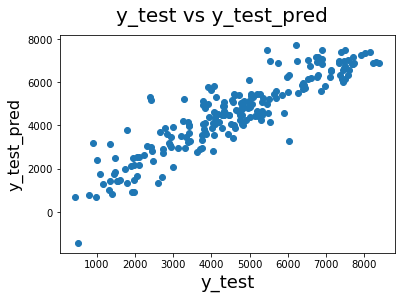

In [279]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

In [280]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_true = y_test, y_pred = y_test_pred)
r_squared

0.8132736736429257

In [281]:
# Calculating the 'adjusted R-Squared' value:
# Sample Size, N = 219
# Number of predictor variables, p = 14

adj_r2_score = 1 - (((1 - r_squared) * (219 - 1))/ (219 - 14 - 1))
adj_r2_score

0.8004591218341068

In [282]:
# Difference between the r-squared and adjusted r-squared = 0.8133 (approx.) - 0.8004 (approx.) = 0.0129 or 1.29%

In [283]:
# Calculating the MSE (mean squared error) value:

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)

670039.2903421605

In [284]:
# Calculating the value of RMSE (Root Mean Square Error) value:

np.sqrt(mean_squared_error(y_test, y_test_pred))

818.5592772317473

In [285]:
# R-squared for the X_train of final model (model 7): 0.840
# R-squared on the test data: 0.813 (approx.)
# Difference: 0.840 - 0.813 = 0.027 or 2.7% (approx.)

# Adjusted R-squared for the X_train of final model (model 7): 0.835
# Adjusted R-squared on the test data: 0.802 (approx.)
# Difference: 0.835 - 0.802 = 0.033 or 3.3% (approx.)

### Result: cnt = (2036.42 x yr) - (798.93 x holiday) + (3804.10 x temp) - (1378.52 x windspeed) - (622.70 x spring) + (289.19 x summer) + (770.57 x winter) - (2545.82 x Light Rain) - (707.90 x Mist) - (387.05 x Dec) - (436.95 x Jan) - (437.87 x Jul) - (363.78 x Nov) + (592.96 x Sep)

In [286]:
# Inference: The count of total rental bikes (cnt) would increase with these variables:

# 1.) yr (if the value is '1', then 'cnt' would increase by 2,036.42 units)
# 2.) temp (if temperature increases by 1 degree Celsius, 'cnt' would increase by 3,804.10 units)
# 3.) summer (if the value is '1', then 'cnt' would increase by 289.19 units)
# 4.) winter (if the value is '1', then 'cnt' would increase by 770.57)
# 5.) sep (if the value is '1', then 'cnt' would increase by 592.96 units)

# These variables would contribute in the reduction of 'cnt':

# 1.) holiday (if the value is '1', then 'cnt' would decrease by 798.93 units)
# 2.) Windspeed (With every unit increase in wind speed, 'cnt' would decrease by 1,378.52 units)
# 3.) spring (if the value is '1', then 'cnt' would decrease by 622.70 units)
# 4.) Light Rain (if the value is '1', then 'cnt' would decrease by 2,545.82 units)
# 5.) Mist (if the value is '1', then 'cnt' would decrease by 707.90 units)
# 6.) Dec (if the value is '1', then 'cnt' would decrease by 387.05 units)
# 7.) Jan (if the value is '1', then 'cnt' would decrease by 436.95 units)
# 8.) Jul (if the value is '1', then 'cnt' would decrease by 437.87 units)
# 9.) Nov (if the value is '1', then 'cnt' would decrease by 363.78 units)

In [287]:
# Based on these outcomes, 'BoomBikes' should devise the marketing strategies according to the quantum (coefficients)
# of these variables. For example, the coefficient of Jan is higher than Nov. A per the results obtained, the company
# may expect a similar 'cnt' (in Nov and Jan) if they spend more on the marketing budget in January than in November.